In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
#Transfering data to GPU memory will take time and we only do it, if we really need to use GPU
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0],-1) #reshape 2D image into a 1D vector
x_test = x_test.reshape(x_test.shape[0], -1) #reshape 2D image into a 1D vector
##
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
#normalizing the input vectors
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [5]:
no_classes = 10

In [6]:
#change the output to one-hot vectors
y_train = keras.utils.to_categorical(y_train, no_classes)
y_test = keras.utils.to_categorical(y_test, no_classes)

In [7]:
def create_model(shape_of_input, no_classes, no_hidden_layers=0, no_units_per_layer=50):
    model = Sequential()
    if (no_hidden_layers == 0):
        model.add(Dense(no_classes, input_shape = shape_of_input, name='output_layer', activation='softmax'))
        return model
    model.add(Dense(no_units_per_layer, input_shape = shape_of_input,  activation='relu'))
    for i in range(no_hidden_layers-1):
        model.add(Dense(no_units_per_layer, activation='relu'))
    model.add(Dense(no_classes, name='output_layer', activation='softmax'))
    return model

In [8]:
import time

neurons_per_layer = [20,50,80,100,150,200] 
no_epochs = 10
x = np.arange(6)
y_train_error_list = []
y_test_error_list = []
training_time_list = []
inference_time_list = []
for i in neurons_per_layer:
    y_train_error = []
    training_time = []
    y_test_error = []
    inference_time = []
    for j in x:
        model = create_model((x_train.shape[1],), no_classes, j, i)
        model.summary()
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        print('%d neurons per layer' % i)
        print('%d hidden layers' % j)
        start = time.time()
#         model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))
        model.fit(x_train, y_train, epochs=no_epochs, batch_size=128, verbose=1)
        end = time.time()
        training_time.append((end - start)/no_epochs)
        #train error
        _, train_accuracy = model.evaluate(x_train, y_train)
        train_error = (1 - train_accuracy)*100
        y_train_error.append(train_error)
        #test_error
        start = time.time()
        _, test_accuracy = model.evaluate(x_test, y_test)
        end = time.time()
        inference_time.append(end - start)
        ##
        test_error = (1 - test_accuracy)*100
        y_test_error.append(test_error)
    y_train_error_list.append(y_train_error)
    y_test_error_list.append(y_test_error)
    training_time_list.append(training_time)
    inference_time_list.append(inference_time)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
output_layer (Dense)         (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
20 neurons per layer
0 hidden layers
Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 1.9582 - accuracy: 0.3411
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 1.8465 - accuracy: 0.3746
Epoch 3/10
391/391 [==============================] - 2s 6ms/step - loss: 1.8223 - accuracy: 0.3834
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 1.8023 - accuracy: 0.3896
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7928 - accuracy: 0.3951
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 1.7908 - accuracy: 0.3924
Epoch 7/1

Epoch 1/10
391/391 [==============================] - 2s 5ms/step - loss: 1.8594 - accuracy: 0.3328
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 1.6666 - accuracy: 0.4053
Epoch 3/10
391/391 [==============================] - 2s 6ms/step - loss: 1.5990 - accuracy: 0.4293
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 1.5525 - accuracy: 0.4463
Epoch 5/10
391/391 [==============================] - 2s 6ms/step - loss: 1.5217 - accuracy: 0.4562
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 1.5006 - accuracy: 0.4659
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 1.4757 - accuracy: 0.4733
Epoch 8/10
391/391 [==============================] - 2s 6ms/step - loss: 1.4566 - accuracy: 0.4788
Epoch 9/10
391/391 [==============================] - 2s 6ms/step - loss: 1.4418 - accuracy: 0.4858
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.5271 - accuracy: 0.4563

391/391 [==============================] - 3s 7ms/step - loss: 1.4155 - accuracy: 0.5012
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 1.3670 - accuracy: 0.5182
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 1.3323 - accuracy: 0.5301
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 1.3002 - accuracy: 0.5407
Epoch 8/10
391/391 [==============================] - 3s 7ms/step - loss: 1.2718 - accuracy: 0.5528
Epoch 9/10
391/391 [==============================] - 3s 7ms/step - loss: 1.2530 - accuracy: 0.5568
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 1.4545 - accuracy: 0.4926
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 50)                153650    
_________________________________________________________________
dense_19 (Dense)        

391/391 [==============================] - 1s 4ms/step - loss: 1.9476 - accuracy: 0.3403
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 1.8456 - accuracy: 0.3748
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 1.8138 - accuracy: 0.3840
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 1.8007 - accuracy: 0.3876
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7886 - accuracy: 0.3942
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7906 - accuracy: 0.3938
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7750 - accuracy: 0.3972
Epoch 8/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7681 - accuracy: 0.4023
Epoch 9/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7673 - accuracy: 0.4007
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.8958 - accuracy: 0.3659
Model: "se

391/391 [==============================] - 3s 8ms/step - loss: 1.7326 - accuracy: 0.3836
Epoch 2/10
391/391 [==============================] - 4s 9ms/step - loss: 1.5226 - accuracy: 0.4615
Epoch 3/10
391/391 [==============================] - 4s 9ms/step - loss: 1.4309 - accuracy: 0.4932
Epoch 4/10
391/391 [==============================] - 4s 9ms/step - loss: 1.3644 - accuracy: 0.5196
Epoch 5/10
391/391 [==============================] - 4s 9ms/step - loss: 1.3123 - accuracy: 0.5371
Epoch 6/10
391/391 [==============================] - 4s 9ms/step - loss: 1.2622 - accuracy: 0.5524
Epoch 7/10
391/391 [==============================] - 4s 9ms/step - loss: 1.2193 - accuracy: 0.5674
Epoch 8/10
391/391 [==============================] - 4s 9ms/step - loss: 1.1814 - accuracy: 0.5804
Epoch 9/10
391/391 [==============================] - 4s 9ms/step - loss: 1.1512 - accuracy: 0.5907
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 1.4253 - accuracy: 0.5000
Model: "se

391/391 [==============================] - 4s 9ms/step - loss: 1.3387 - accuracy: 0.5314
Epoch 5/10
391/391 [==============================] - 4s 9ms/step - loss: 1.2767 - accuracy: 0.5524
Epoch 6/10
391/391 [==============================] - 3s 9ms/step - loss: 1.2293 - accuracy: 0.5692
Epoch 7/10
391/391 [==============================] - 4s 9ms/step - loss: 1.1807 - accuracy: 0.5859
Epoch 8/10
391/391 [==============================] - 4s 9ms/step - loss: 1.1443 - accuracy: 0.5993
Epoch 9/10
391/391 [==============================] - 4s 9ms/step - loss: 1.1079 - accuracy: 0.6128
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.4698 - accuracy: 0.5008
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_49 (Dense)       

391/391 [==============================] - 1s 3ms/step - loss: 1.9589 - accuracy: 0.3383
Epoch 2/10
391/391 [==============================] - 2s 5ms/step - loss: 1.8495 - accuracy: 0.3721
Epoch 3/10
391/391 [==============================] - 2s 5ms/step - loss: 1.8238 - accuracy: 0.3809
Epoch 4/10
391/391 [==============================] - 2s 5ms/step - loss: 1.8022 - accuracy: 0.3901
Epoch 5/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7940 - accuracy: 0.3907
Epoch 6/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7836 - accuracy: 0.3938
Epoch 7/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7766 - accuracy: 0.3977
Epoch 8/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7805 - accuracy: 0.3975
Epoch 9/10
391/391 [==============================] - 2s 5ms/step - loss: 1.7713 - accuracy: 0.4014
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.8976 - accuracy: 0.3775
Model: "se

391/391 [==============================] - 2s 6ms/step - loss: 1.6906 - accuracy: 0.3975
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 1.4825 - accuracy: 0.4765
Epoch 3/10
391/391 [==============================] - 2s 6ms/step - loss: 1.3749 - accuracy: 0.5133
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 1.3020 - accuracy: 0.5374
Epoch 5/10
391/391 [==============================] - 2s 6ms/step - loss: 1.2327 - accuracy: 0.5615
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 1.1743 - accuracy: 0.5828
Epoch 7/10
391/391 [==============================] - 3s 8ms/step - loss: 1.1173 - accuracy: 0.6031
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 1.0616 - accuracy: 0.6192
Epoch 9/10
391/391 [==============================] - 5s 12ms/step - loss: 1.0108 - accuracy: 0.6399
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 1.4470 - accuracy: 0.5190
Model: "

391/391 [==============================] - 3s 7ms/step - loss: 1.2704 - accuracy: 0.5548
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 1.1961 - accuracy: 0.5803
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 1.1307 - accuracy: 0.6018
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0696 - accuracy: 0.6243
Epoch 8/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0097 - accuracy: 0.6456
Epoch 9/10
391/391 [==============================] - 3s 7ms/step - loss: 0.9565 - accuracy: 0.6649
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.5299 - accuracy: 0.5202
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 200)               614600    
_________________________________________________________________
dense_79 (Dense)       

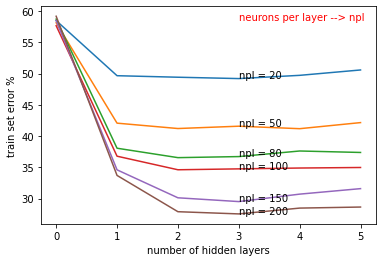

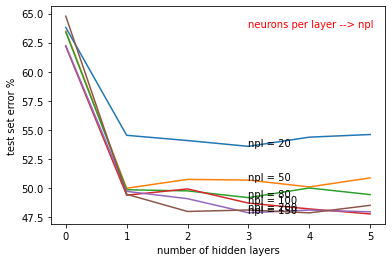

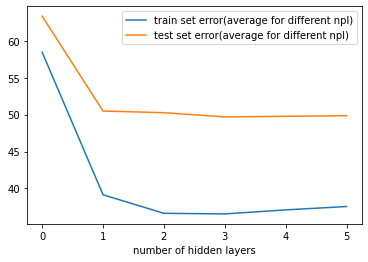

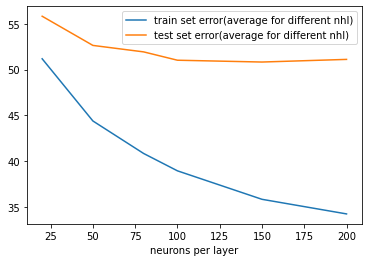

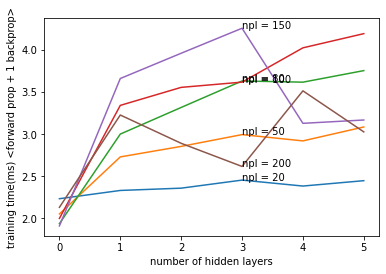

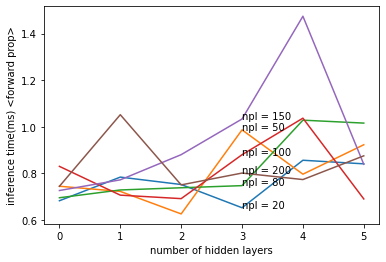

In [11]:
########plot 1
plt.xlabel("number of hidden layers")
plt.ylabel('train set error %')
n = len(neurons_per_layer)
for i in range(n):
    plt.plot(x, y_train_error_list[i])
    plt.text(x[3], y_train_error_list[i][3], f'npl = {neurons_per_layer[i]}')
plt.text(3,y_train_error_list[0][0],'neurons per layer --> npl', c='r')
########plot 2
plt.figure()
plt.xlabel("number of hidden layers")
plt.ylabel('test set error %')
n = len(neurons_per_layer)
for i in range(n):
    plt.plot(x, y_test_error_list[i])
    plt.text(x[3], y_test_error_list[i][3], f'npl = {neurons_per_layer[i]}')
plt.text(3,y_test_error_list[0][0],'neurons per layer --> npl', c='r')
########plot 3 (number of hidden layers / train and test set error)
mean_train_errors = np.mean(y_train_error_list, axis=0)
mean_test_errors = np.mean(y_test_error_list, axis=0)
plt.figure()
plt.xlabel("number of hidden layers")
plt.plot(x, mean_train_errors, label='train set error(average for different npl)')
plt.plot(x, mean_test_errors, label='test set error(average for different npl)')
plt.legend()
########plot 4 (neurons per layer / train and test set error)
mean_train_errors = np.mean(y_train_error_list, axis=1)
mean_test_errors = np.mean(y_test_error_list, axis=1)
plt.figure()
plt.xlabel("neurons per layer")
plt.plot(neurons_per_layer, mean_train_errors, label='train set error(average for different nhl)')
plt.plot(neurons_per_layer, mean_test_errors, label='test set error(average for different nhl)')
plt.legend()
########plot 5 (training time)
plt.figure()
n = len(neurons_per_layer)
plt.xlabel("number of hidden layers")
plt.ylabel("training time(ms) <forward prop + 1 backprop>")
for i in range(n):
    plt.plot(x, training_time_list[i])
    plt.text(x[3], training_time_list[i][3], f'npl = {neurons_per_layer[i]}')
########plot 6 (inference time)
plt.figure()
n = len(neurons_per_layer)
plt.xlabel("number of hidden layers")
plt.ylabel("inference time(ms) <forward prop>")
for i in range(n):
    plt.plot(x, inference_time_list[i])
    plt.text(x[3], inference_time_list[i][3], f'npl = {neurons_per_layer[i]}')

In [12]:
# f = open('no_hidden_layers___test_set_error_v2.txt', 'w')

# f.write('number of hidden layers, train error, test error\n')
# for i in range(len(x)):
#     f.write('{}, {}, {}'.format(x[i], y_train_error[i], y_test_error[i]))
#     f.write('\n')

# f.close()